In [1]:
import pandas as pd
best_df = pd.read_csv('베스트셀러_최종버전11.csv')

In [2]:
best_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITLE           5143 non-null   object 
 1   AUTHOR          5143 non-null   object 
 2   PUBLER          5143 non-null   object 
 3   CLASS_NO        5143 non-null   object 
 4   PUBLER_YEAR     5143 non-null   int64  
 5   PAGE            5143 non-null   float64
 6   ISBN            5143 non-null   int64  
 7   kyobo_best      5143 non-null   float64
 8   aladin_best     5143 non-null   float64
 9   yes24_best      5143 non-null   float64
 10  yp_best         5143 non-null   float64
 11  LOAN_COUNT      5143 non-null   float64
 12  E_BOOK          5143 non-null   object 
 13  kyobo_po        5143 non-null   float64
 14  kyobo_ne        5143 non-null   float64
 15  kyobo_pnscore   5143 non-null   float64
 16  kyobo_review    5143 non-null   float64
 17  kyobo_rating    5143 non-null   f

### 장르별 “가장 높은 플랫폼”만 표시한 히트맵

C:\Users\user\AppData\Local\Temp\ipykernel_8568\2657255544.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.11' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  max_only.loc[idx, top_platform] = row[top_platform]
C:\Users\user\AppData\Local\Temp\ipykernel_8568\2657255544.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  max_only.loc[idx, top_platform] = row[top_platform]
C:\Users\user\AppData\Local\Temp\ipykernel_8568\2657255544.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  max_only.loc[idx, top_platfo

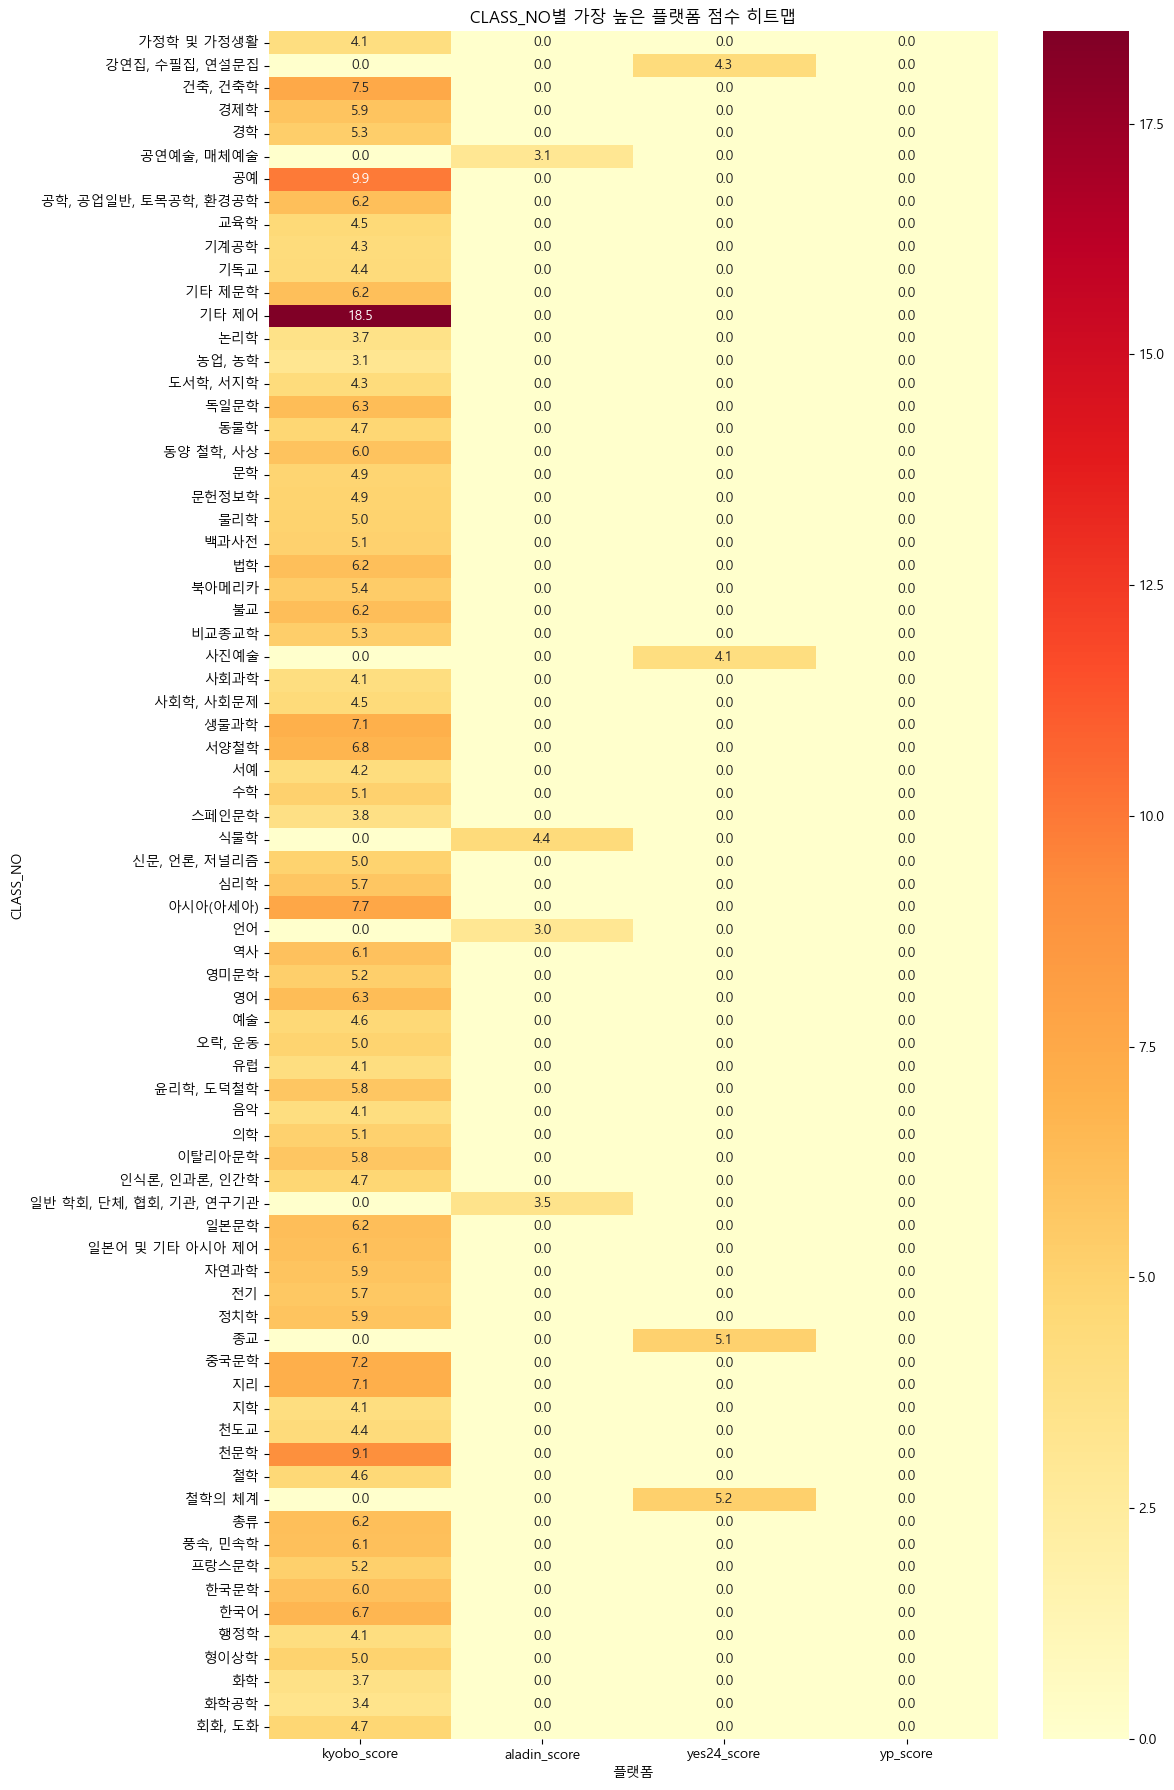

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 글씨 깨짐 방지 (한글 폰트 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우일 경우
plt.rcParams['axes.unicode_minus'] = False

# 1. 플랫폼 점수 컬럼 정의
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_scores = best_df.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO에서 가장 높은 플랫폼만 남긴 새로운 매트릭스 생성
max_only = pd.DataFrame(0, index=genre_scores.index, columns=platform_scores)

for idx, row in genre_scores.iterrows():
    top_platform = row.idxmax()
    max_only.loc[idx, top_platform] = row[top_platform]

# 4. 히트맵 시각화
plt.figure(figsize=(12, 18))
sns.heatmap(max_only, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title("CLASS_NO별 가장 높은 플랫폼 점수 히트맵")
plt.xlabel("플랫폼")
plt.ylabel("CLASS_NO")
plt.tight_layout()
plt.show()


In [4]:
best_df[best_df['CLASS_NO'] == '기타 제어']

,TITLE,AUTHOR,PUBLER,CLASS_NO,PUBLER_YEAR,PAGE,ISBN,kyobo_best,aladin_best,yes24_best,...,yp_pnscore,yp_review,yp_rating,yp_score,yes24_po,yes24_ne,yes24_pnscore,yes24_review,yes24_rating,yes24_score
513,(지적이고 아름다운 삶을 위한) 라틴어 수업,한동일,흐름출판,기타 제어,2017,309.0,9788965962205,1.0,0.0,0.0,...,0.91,22.0,4.5,3.58,75.0,22.0,0.77,97.0,4.1,7.08
4809,(한동일의) 라틴어 인생 문장 :삶의 고비마다 나를 일으킨 단 한 줄의 희망,한동일,이야기장수,기타 제어,2023,375.0,9788954695800,0.0,1.0,2.0,...,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00


In [5]:
best_df.loc[best_df['CLASS_NO'] == '기타 제어', 'kyobo_score']

513     31.77
4809     5.24
Name: kyobo_score, dtype: float64

- 이상치라 판단하고 인덱스 1031 드랍

In [6]:
best_df = best_df.drop(513)

C:\Users\user\AppData\Local\Temp\ipykernel_8568\3142308926.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.11' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  max_only.loc[idx, top_platform] = row[top_platform]
C:\Users\user\AppData\Local\Temp\ipykernel_8568\3142308926.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  max_only.loc[idx, top_platform] = row[top_platform]
C:\Users\user\AppData\Local\Temp\ipykernel_8568\3142308926.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  max_only.loc[idx, top_platfo

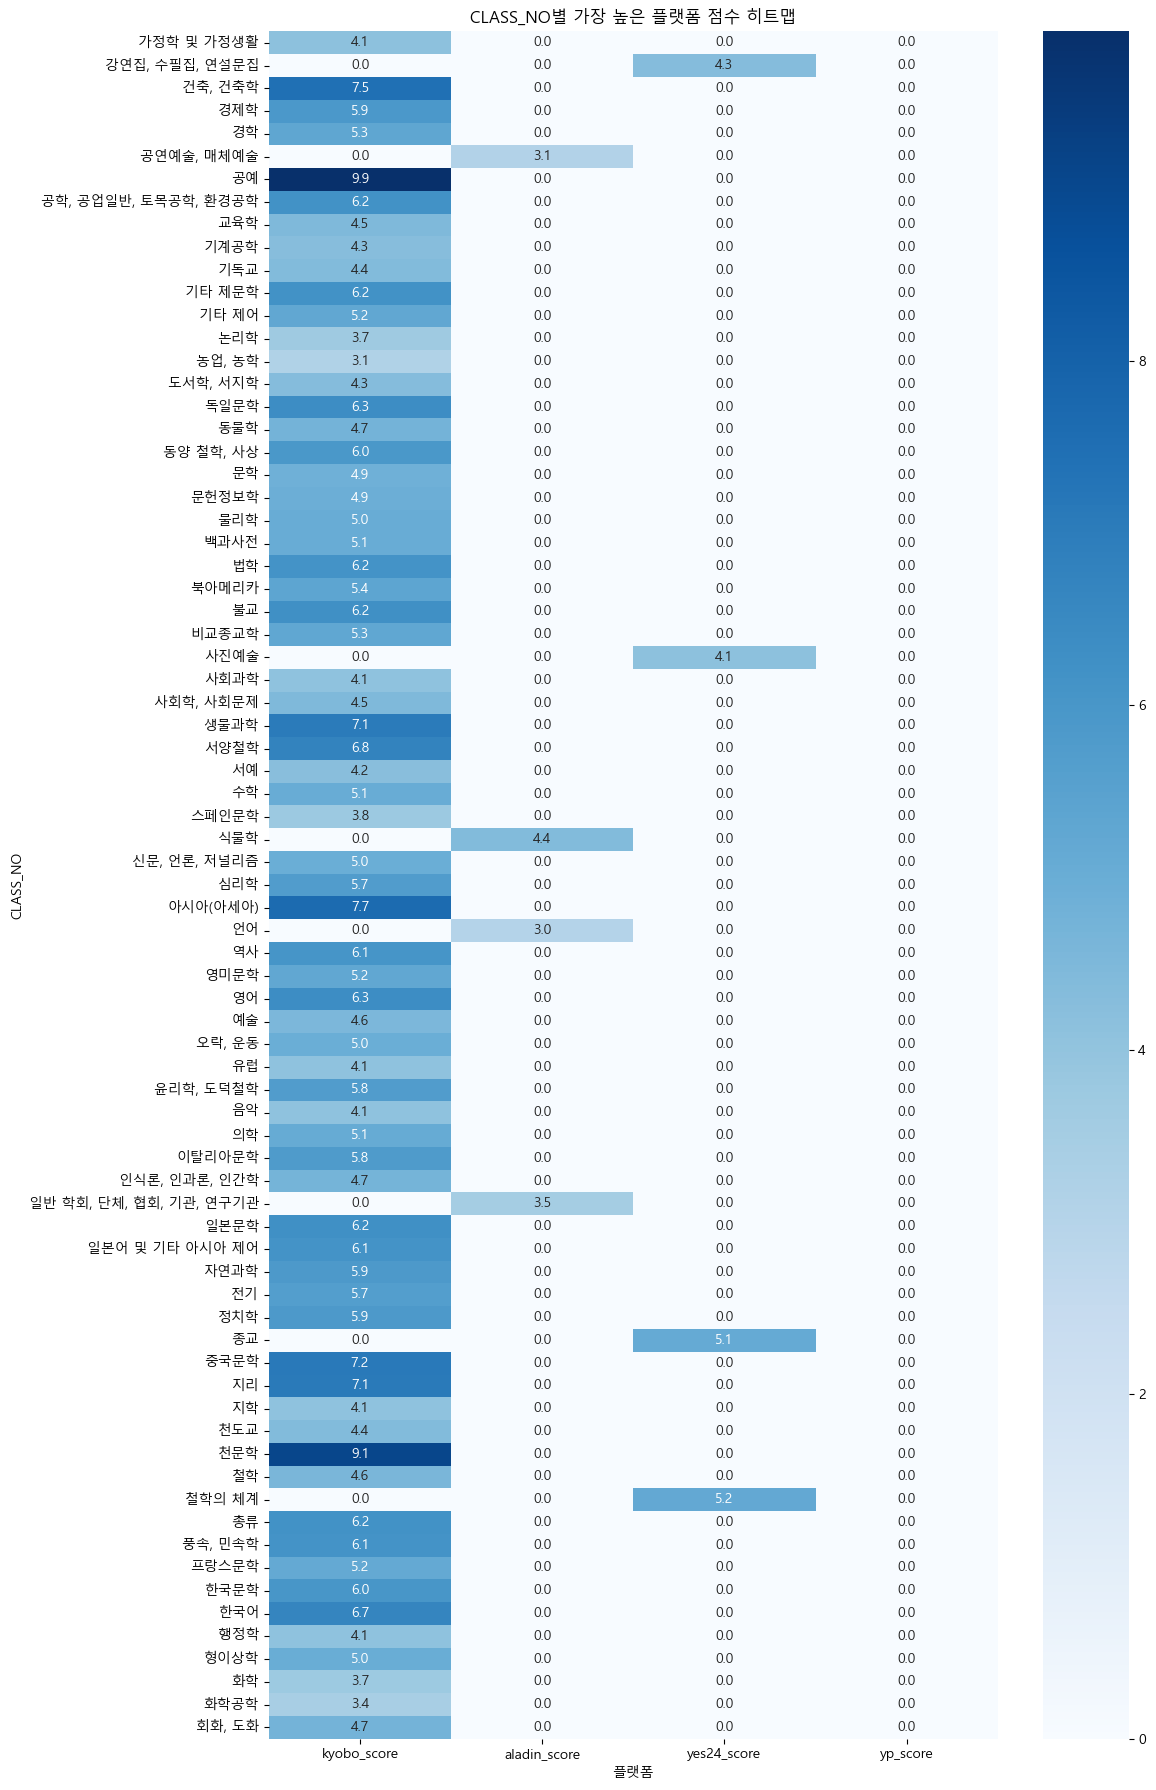

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 글씨 깨짐 방지 (한글 폰트 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우일 경우
plt.rcParams['axes.unicode_minus'] = False

# 1. 플랫폼 점수 컬럼 정의
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_scores = best_df.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO에서 가장 높은 플랫폼만 남긴 새로운 매트릭스 생성
max_only = pd.DataFrame(0, index=genre_scores.index, columns=platform_scores)

for idx, row in genre_scores.iterrows():
    top_platform = row.idxmax()
    max_only.loc[idx, top_platform] = row[top_platform]

# 4. 히트맵 시각화
plt.figure(figsize=(12, 18))
sns.heatmap(max_only, annot=True, fmt=".1f", cmap='Blues')
plt.title("CLASS_NO별 가장 높은 플랫폼 점수 히트맵")
plt.xlabel("플랫폼")
plt.ylabel("CLASS_NO")
plt.tight_layout()
plt.show()

### 분석
- 이상치 제거했더니 훨씬 정상적인 분포를 보여줌
- 교보문고의 우세는 여전하지만, 다른 플랫폼들도 존재감을 드러내고 있음

* 교보문고의 강세
    * 광범위한 점수를 보여줌
    * 특히 인문/사회/종교/역사/정치/문학 등 비소설 계열 장르에서 매우 높은 점수 기록
    * 점수 분포가 넓고 강도도 높음
    * 높은 점수를 기록한 범주
        * 공예(9.9) / 천문학(9.1) / 아시아(아세아)(7.7) / 건축, 건축학(7.5) /
        <br>중국문학(7.2) / 지리(7.1) / 생물과학(7.1)

* 알라딘의 존재감
    * 몇몇 장르에서 최고 플랫폼으로 등장
    * 공연예술, 논리학, 식물학 등

* 예스24
    * 종교, 철학의 체계 등 에서 강한 점수를 기록
        * 전문서적 중심으로 리뷰 품질이 높음
    * 높은 점수를 기록한 범주
        * 철학의 체계(5.2) / 종교(5.1) / 강연집, 수필집, 연설문집(4.3) / 사진예술(4.1)

* 영풍문고
    * 모든 장르에서 점수 0
    * 본 프로젝트 기준에서 영향력 평가가 어려움


## 교차등재율 분석

In [8]:
cross_df = pd.read_csv('베스트셀러_최종버전11.csv')

In [9]:
for col in ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']:
    if col in cross_df.columns: # 열이 존재할 경우에만 적용
        cross_df[col] = cross_df[col].apply(lambda x: 1 if x >= 1 else 0)

        kyobo  aladin  yes24     yp
kyobo   100.0    59.3   55.2   46.5
aladin   45.0   100.0   47.2   25.3
yes24    74.1    83.4  100.0   44.8
yp       79.2    56.8   56.9  100.0


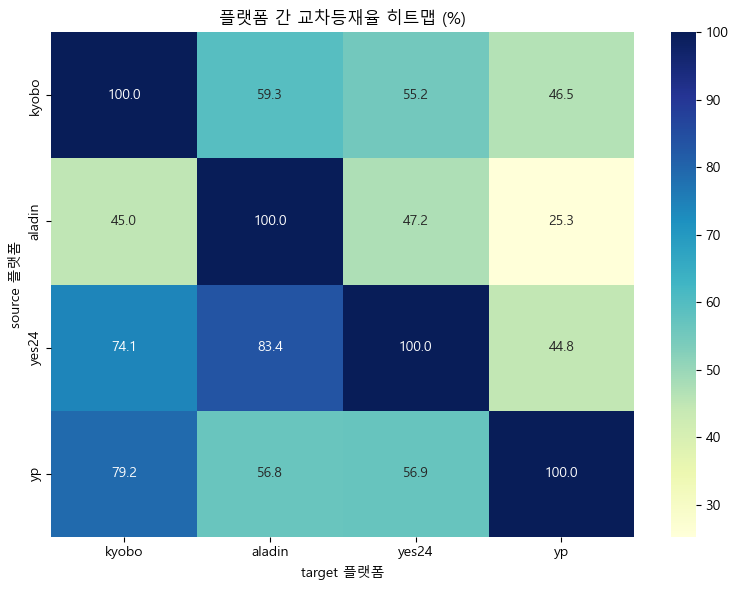

In [10]:
import pandas as pd

platforms = ['kyobo', 'aladin', 'yes24', 'yp']
cross_rate = pd.DataFrame(index=platforms, columns=platforms)

for source in platforms:
    source_books = cross_df[cross_df[f'{source}_best'] == 1]

    for target in platforms:
        if len(source_books) == 0:
            rate = 0
        else:
            overlap = source_books[source_books[f'{target}_best'] == 1]
            rate = len(overlap) / len(source_books) * 100
        cross_rate.loc[source, target] = round(rate, 1)

cross_rate = cross_rate.astype(float)
print(cross_rate)

plt.figure(figsize=(8, 6))
sns.heatmap(cross_rate, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("플랫폼 간 교차등재율 히트맵 (%)")
plt.xlabel("target 플랫폼")
plt.ylabel("source 플랫폼")
plt.tight_layout()
plt.show()

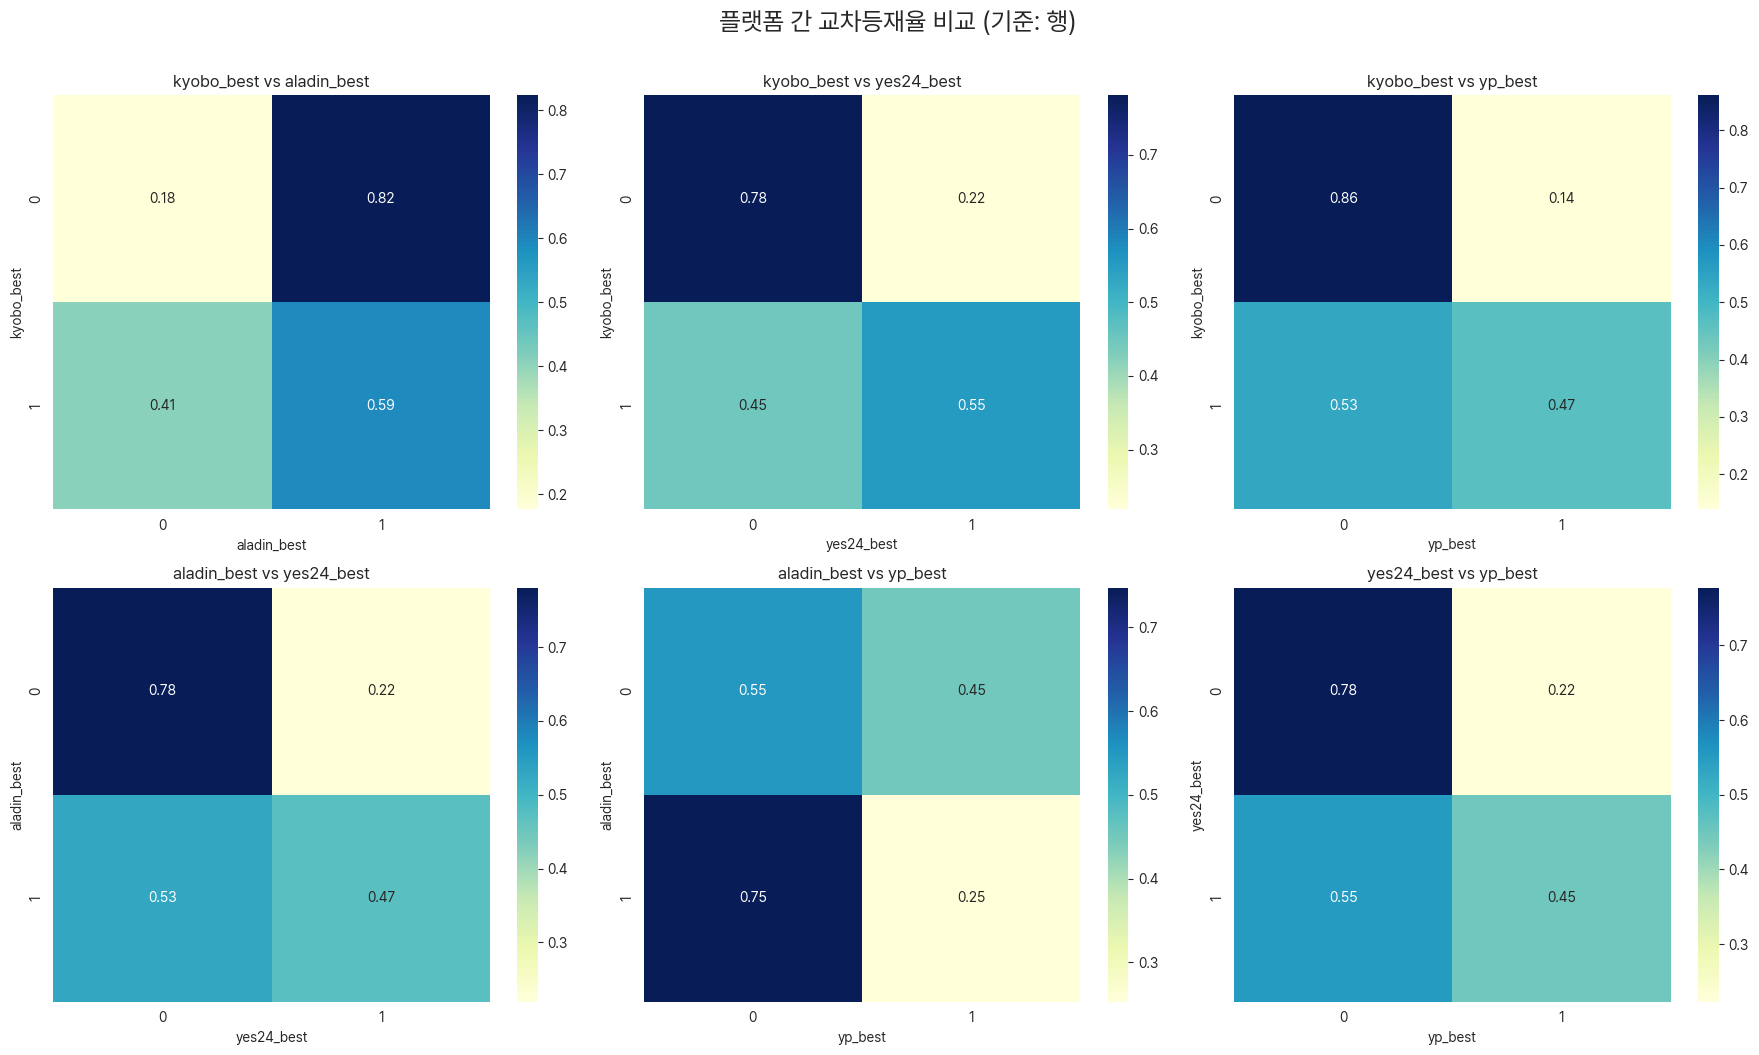

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
from itertools import combinations

fontpath='C:/Users/user/Desktop/fonts/Pretendard-Bold.ttf' #각자의 경로를 넣습니다.
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='Pretendard')

# 플랫폼 조합 설정
platforms = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']
pairs = list(combinations(platforms, 2))

# 서브플롯 준비 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # 2차원 배열 → 1차원으로 펼치기

# 각 조합별 히트맵 작성
for i, (col1, col2) in enumerate(pairs):
    cross = pd.crosstab(cross_df[col1], cross_df[col2], normalize='index')
    sns.heatmap(cross, annot=True, cmap="YlGnBu", fmt=".2f", ax=axes[i])
    axes[i].set_title(f'{col1} vs {col2}')
    axes[i].set_xlabel(col2)
    axes[i].set_ylabel(col1)

# 빈 칸 처리 (6개 이하일 경우)
for j in range(len(pairs), len(axes)):
    fig.delaxes(axes[j])  # 남은 subplot 삭제

plt.tight_layout()
plt.suptitle(" 플랫폼 간 교차등재율 비교 (기준: 행)", fontsize=18, y=1.05)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_8568\1026478800.py:63: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8568\1026478800.py:63: UserWarning: Glyph 47019 (\N{HANGUL SYLLABLE RAES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8568\1026478800.py:63: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8568\1026478800.py:63: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8568\1026478800.py:63: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8568\1026478800.py:63: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  plt.tight_layout()
C:\

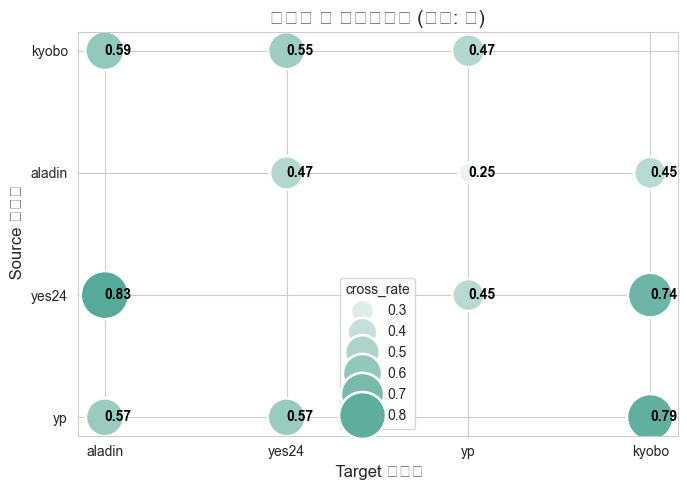

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import itertools

fontpath='C:/Users/user/Desktop/fonts/Pretendard-Bold.ttf' #각자의 경로를 넣습니다.
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='Pretendard')

# 플랫폼 컬럼
platform_cols = ['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']

# 교차등재율 계산
records = []
for source, target in itertools.product(platform_cols, repeat=2):
    if source != target:
        cross = pd.crosstab(cross_df[source], cross_df[target], normalize='index')
        rate = cross.loc[1, 1] if (1 in cross.index and 1 in cross.columns) else 0
        records.append({
            'source': source.replace('_best', ''),
            'target': target.replace('_best', ''),
            'cross_rate': rate
        })

dot_df = pd.DataFrame(records)

# 시각화
plt.figure(figsize=(7, 5))  # 전체 크기 조정
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=dot_df,
    x='target',
    y='source',
    size='cross_rate',
    hue='cross_rate',
    sizes=(200, 1200),  # 원 크기 확대
    palette='light:#5A9',
    legend='brief'
)

# 텍스트를 원 옆에 표시 (오른쪽)
for _, row in dot_df.iterrows():
        plt.text(
        x=row['target'], 
        y=row['source'], 
        s=f"{row['cross_rate']:.2f}",
        color='black', 
        ha='left', 
        va='center', 
        fontsize=10, 
        weight='bold',
        transform=scatter.transData,
        # 위에 없는 속성 → 사용 안 해야 함: xytext, textcoords ❌
    )

plt.title(" 플랫폼 간 교차등재율 (기준: 행) ", fontsize=14)
plt.xlabel(" Target 플랫폼", fontsize=12)
plt.ylabel(" Source 플랫폼", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
